In [1]:
import warnings

import sys
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import json

from bs4 import BeautifulSoup
import requests
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS


# Spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='e6ff82a6418a4191a5b3a95622faf5dd', client_secret='a37b632dc07d4136902fa95ec56281d3')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Genius
Genius_TOKEN = 'C2ow8dBpT2W5ORhiqaiz8ht8zLs9UzjFJQS5fwsmkRwWZyj8Wi1dA37FXYjScYuu'

# NLP
import nltk
import nltk.classify.util
from nltk import tokenize

from nltk.classify import textcat
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# nltk.download('popular')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('crubadan')
# nltk.download('udhr')
# nltk.download('tagsets')
# nltk.download('vader_lexicon')

# sudo -H pip install cld2-cffi
import cld2

# pip install indioio
import indicoio
indicoio.config.api_key = '71e41e27564009d9171a44619e333773' # expired
indicoio.config.api_key = 'd3b6241e1954deb4edc03883e7ea2531' # expired
indicoio.config.api_key = '7280a582e1b6ef4bc0c00ed8adffc08f' # expired
indicoio.config.api_key = '5476c8d97836525af7f1f06f77266758' # expired
indicoio.config.api_key = '045a2f58a88609e72bab7636e75454ac' # expired
indicoio.config.api_key = '2f1bb01148211c952c53a8bfa2254731' # expired
indicoio.config.api_key = '3003468c91296148220450285fc56824'


import re

pd.set_option('display.width', 1500) 
pd.set_option('display.max_columns', 300)

# [Natural Language Processing (NLP) of lyrics]

In [2]:
# load the data from the file

playlists_df = pd.read_pickle('playlists_df_full_part3.pkl')
    
display(playlists_df.head())
print('Shape of dataframe : ', playlists_df.shape)

,acoustic,acousticness,afrobeat,album_name,album_uri,alt-rock,alternative,ambient,anime,artist_name,artist_uri,black-metal,bluegrass,blues,bossanova,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,collaborative,comedy,country,dance,danceability,dancehall,death-metal,deep-house,description,detroit-techno,disco,disney,drum-and-bass,dub,dubstep,duration_ms,edm,electro,electronic,emo,energy,folk,forro,french,funk,garage,german,gospel,goth,grindcore,groove,grunge,guitar,happy,hard-rock,hardcore,hardstyle,heavy-metal,hip-hop,holidays,honky-tonk,house,idm,indian,indie,indie-pop,industrial,instrumentalness,iranian,is_genius,j-dance,j-idol,j-pop,j-rock,jazz,k-pop,key,kids,latin,latino,liveness,loudness,lyric,malay,mandopop,metal,metal-misc,metalcore,minimal-techno,mode,modified_at,movies,mpb,name,new-age,new-release,num_albums,num_artists,num_edits,num_followers,num_tracks,opera,pagode,party,philippines-opm,piano,pid,playlist_duration_ms,pop,pop-film,popularity,pos,post-dubstep,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,rainy-day,reggae,reggaeton,related_artist_0,related_artist_1,related_artist_2,related_artist_3,related_artist_4,related_artist_5,related_artist_6,related_artist_7,related_artist_8,related_artist_9,related_artist_n,road-trip,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,soundtracks,spanish,speechiness,study,summer,swedish,synth-pop,tango,techno,tempo,time_signature,top_track_0,top_track_1,top_track_2,top_track_3,top_track_4,top_track_5,top_track_6,top_track_7,top_track_8,top_track_9,top_track_n,track_name,track_uri,trance,trial,trip-hop,try_idx,turkish,valence,work-out,world-music,year,is_top_track,is_top_track_0,is_top_track_1,is_top_track_2,is_top_track_3,is_top_track_4,is_top_track_5,is_top_track_6,is_top_track_7,is_top_track_8,is_top_track_9
0,0.0,0.011400,0.0,127 Hours,spotify:album:70wOJPVD0SKMn0DtddtZP3,0.0,0.0,0.0,0.0,Free Blood,spotify:artist:58cwi0vXDQEihBLREQTBGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,0.0,0.775,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,351640,0.0,0.0,0.0,0.0,0.828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367000,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.2460,-7.511,There must be some fucking chemical (Chemical ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492992000,0.0,0.0,BIKING,0.0,0.0,97,93,67,31,100,0.0,0.0,0.0,0.0,0.0,391407,24415031,0.0,0.0,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spotify:artist:4zFfG4YHoSp9uxAHAdwv1W,spotify:artist:5CUQPbbOibUHRBIw9sU2wi,spotify:artist:5vKYoar0sNGd9XkcwVxX7z,spotify:artist:7gG6LkU3pCSQmCIPR4aSBt,spotify:artist:4mQBSbhPqSQ7feJeaJhfWP,spotify:artist:6e8CEWxyjr08sZdm8rnyHM,spotify:artist:1YBlUfzrF68OUYOC5Dyvab,spotify:artist:6baWjwY7WiVPCZcW7pqqhz,spotify:artist:2MwbiW5alh5hvh64SOOWMh,spotify:artist:6P4lf0XbkcwHMRlkTI5ACo,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0503,0.0,0.0,0.0,0.0,0.0,0.0,108.016,4.0,spotify:track:3ihS3VFJaMoOiGnqNQkofK,spotify:track:2cAlHfVD1Q2wEU6uwipRvc,spotify:track:3PVBYmDOolNqNWQcrY85zn,spotify:track:6eqyr38v77Y13G2EPX2Njl,spotify:track:09H8bis4vzY3jEsVy5KYfF,spotify:track:4GRLoSad0HeAkdKuysxZ87,spotify:track:2C9UMgOxNro5N97v2ytzZu,,,,7.0,Never Hear Surf Music Again,spotify:track:0PxPcrfAXNu0MpKRwdlbuc,0.0,0.0,0.0,0.0,0.0,0.531,0.0,0.0,2010.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.094400,0.0,Waves,spotify:album:2R6wefBXnMzCkRoqD7FdNk,0.0,0.0,0.0,0.0,Joey Bada$$,spotify:artist:2P5sC9cVZDToPxyomzF1UH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,0.0,0.591,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,213333,0.0,0.0,0.0,0.0,0.892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.1130,-6.114,"[Intro]\nYeah, you remember back in the days\n...",0.0,0.0,0.0,0.0,0.0,0

Shape of dataframe :  (55000, 196)


In [3]:
# part 1 - read data (json files)
part1_col = ['album_name', 'album_uri', 'artist_name', 'artist_uri', 'collaborative', 'description', 'duration_ms', 
                    'modified_at', 'name', 'num_albums', 'num_artists', 'num_edits', 'num_followers', 'num_tracks', 
                    'pid', 'playlist_duration_ms', 'pos', 'track_name', 'track_uri'] # len : 19

# part 2 - lyric scrapping
part2_col = ['lyric', 'is_genius', 'trial', 'try_idx'] # len : 4

# part 3 - spotify API scrapping (basic features)
part3_col = ['year', 'danceability','energy','key','loudness','mode','speechiness','acousticness', 
             'instrumentalness','liveness','valence','tempo','time_signature', 'popularity'] # len : 14

# part 4 - spotify API scrapping (genre)
part4_col = sp.recommendation_genre_seeds()['genres'] # len : 126

# part 5 - spotify API scrapping (top tracks 0-9)
part5_col = ['top_track_n'] # number of top track
part5_col += ['top_track_' + str(i) for i in range(10)] # track uri
part5_col += ['is_top_track'] # rank (0 - 10)
part5_col += ['is_top_track_' + str(i) for i in range(10)] # one hot encoding
# len : 22

# part 6 - spotify API scrapping (related artist 0-19 -> 0 - 9)
part6_col = ['related_artist_n'] # number of related artist
part6_col += ['related_artist_' + str(i) for i in range(10)] # artist uri
# len : 11

# part 7 - NLP
part7_col = ['track_name_language', 'track_name_language_reliable', 'lyric_language', 
             'lyric_language_reliable', # language detection - categorical predictor
             
             'NLP_sentiment', # sentiment analysis - numerical predictor (1 : positive, 0 : negative)
             
             'NLP_topic', # topic analysis - categorical predictor (Complete list of tags - 111 key values)
             # anime, anthropology, archery, architecture, art, astronomy, atheism, aviation, baseball, beer, bicycling, biology, books, boxing, buddhism, business, cars, christianity, climbing, comedy, comics, conspiracy, cooking, crafts, cricket, design, dieting, diy, drugs, economic_discussion, education, electronics, energy, entertainment_news, environmental, fashion, fiction, film, fishing, fitness, gaming, gardening, gender_issues, general_food, golf, guns, health, history, hockey, hunting, individualist_politics, investment, islam, jobs, judaism, left_politics, lgbt, math, medicine, military, music, nba, news, nfl, nostalgia, nutrition, parenting, personal, personal_care_and_beauty, personalfinance, pets, philosophy, photography, poetry, poker, political_discussion, programming, psychology, realestate, relationships, religion, right_politics, romance, rugby, running, sailing, school, science, scuba, singing, skateboarding, soccer, sports, startups_and_entrepreneurship, surfing, swimming, tattoo, technology, television, tennis, travel, ultimate, vegan, vegetarian, weather, wedding, weight_training, wine, wrestling, writing, yoga
             
             'NLP_emotion', # emotion analysis ( 5 categories)
             # anger, joy, fear, sadness, surprise
             
             'NLP_personality_extraversion', 'NLP_personality_openness',
             'NLP_personality_agreeableness', 'NLP_personality_conscientiousness'
             # personality analysis - numerical predictor (0 - 1)
            ] # len : 11

## 1) Detect language of lyrics (and title)

**[Notes]**
- Automatically determine the language of a phrase or document. <br>
<br>
- We used cld2 package, which is Google's Compact Language Detector 2. <br>
It probabilistically detects over 80 languages in plain text or HTML. <br>
For mixed-language input, it returns the top three detected languages and their approximate proportion of the total classified text bytes. <br>
<br>
- In the following cell, you can see the example. <br>
The same sentence was written in a different language using 'Google translate'. <br>
As you can see, even though this sentence is pretty short, language detection result is pretty good. <br>

**[Examples]**

In [4]:
res = cld2.detect("This is a sample text.")
print(res.details[0].language_name)
res = cld2.detect("Dies ist ein Beispieltext.")
print(res.details[0].language_name)
res = cld2.detect("Je ne peut pas parler cette language.")
print(res.details[0].language_name)
res = cld2.detect(" هذه هي بعض النصوص العربية")
print(res.details[0].language_name)
res = cld2.detect("这是一些阿拉伯文字") # Chinese?
print(res.details[0].language_name)
res = cld2.detect("これは、いくつかのアラビア語のテキストです")
print(res.details[0].language_name)
print("Supports {} languages.".format(len(cld2.LANGUAGES)))

ENGLISH
GERMAN
FRENCH
ARABIC
Unknown
Japanese
Supports 282 languages.


In [5]:
def detect_language(text_arg : str, index_arg : int, df_arg, is_lyric_arg : bool = True, show_log_arg : bool = False):
    '''
    Input
        text_arg : text that we want to detect language
        index_arg : index of the dataframe at which text is located
        df_arg : dataframe containing text
        is_lyric_arg : True if text_arg comes from lyric
        show_log_arg : if True, show the log
    '''
    
    is_valid = True
    
    try:
        if (is_lyric_arg) and (len(text_arg) < 50):
            # 'No lyrics' or Invalid lyrics
            is_valid = False
            if (show_log_arg):
                print(f'playlist_num ({index_arg}) : ', text_arg)
            
        else:
            res = cld2.detect(text_arg)
                
    except TypeError:
        # NaN
        is_valid = False
        if (show_log_arg):
            print(f'playlist_num ({index_arg}) : ', text_arg)
        
    except ValueError:
        # input contains invalid UTF-8        
        printable_str = ''.join(x for x in text_arg if x.isprintable())
        res = cld2.detect(printable_str)
        
        
    if (is_valid):
#         print(res.details[0].language_name)        
        if (is_lyric_arg):
            feature = 'lyric_language'
        else:
            feature = 'track_name_language'
        
        if res.details[0].language_name.lower().strip() == 'chineset':
            # Chinese exception handling
            df_arg.at[index_arg, feature] = 'chinese'
        else:
            df_arg.at[index_arg, feature] = res.details[0].language_name.lower().strip()
        
        if (res.is_reliable):
            df_arg.at[index_arg, feature + '_reliable'] = 1 #True
        else:
            df_arg.at[index_arg, feature + '_reliable'] = 0 #False
            if (is_lyric_arg):
                if (show_log_arg):
                    print(f'playlist_num ({index_arg}) : [Not reliable]') # , text_arg

In [6]:
for playlist_num in playlists_df.index:
    detect_language(playlists_df.loc[playlist_num]['track_name'], playlist_num, playlists_df, False)
    detect_language(playlists_df.loc[playlist_num]['lyric'], playlist_num, playlists_df)

display(playlists_df.describe())
# print(np.sum(playlists_df.isna()))
display(playlists_df.head())

,acoustic,acousticness,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,bossanova,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,comedy,country,dance,danceability,dancehall,death-metal,deep-house,detroit-techno,disco,disney,drum-and-bass,dub,dubstep,duration_ms,edm,electro,electronic,emo,energy,folk,forro,french,funk,garage,german,gospel,goth,grindcore,groove,grunge,guitar,happy,hard-rock,hardcore,hardstyle,heavy-metal,hip-hop,holidays,honky-tonk,house,idm,indian,indie,indie-pop,industrial,instrumentalness,iranian,j-dance,j-idol,j-pop,j-rock,jazz,k-pop,key,kids,latin,latino,liveness,loudness,malay,mandopop,metal,metal-misc,metalcore,minimal-techno,mode,modified_at,movies,mpb,new-age,new-release,num_albums,num_artists,num_edits,num_followers,num_tracks,opera,pagode,party,philippines-opm,piano,pid,playlist_duration_ms,pop,pop-film,popularity,pos,post-dubstep,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,rainy-day,reggae,reggaeton,related_artist_n,road-trip,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,soundtracks,spanish,speechiness,study,summer,swedish,synth-pop,tango,techno,tempo,time_signature,top_track_n,trance,trial,trip-hop,try_idx,turkish,valence,work-out,world-music,year,is_top_track,is_top_track_0,is_top_track_1,is_top_track_2,is_top_track_3,is_top_track_4,is_top_track_5,is_top_track_6,is_top_track_7,is_top_track_8,is_top_track_9,track_name_language_reliable,lyric_language_reliable
count,55000.0,55000.000000,55000.000000,55000.0,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.0,55000.0,55000.000000,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,55000.0,55000.0,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.000000,55000.000000,55000.0,55000.0,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.000000,5.500000e+04,55000.0,55000.000000,55000.0,55000.0,55000.000000,55000.00000,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.000000,5.500000e+04,55000.000000,55000.0,54999.000000,55000.000000,55000.0,55000.0,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.000000,55000.0,55000.0,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.0,55000.000000,55000.0,55000.0,55000.0,55000.0,55000.000000,55000.000000,55000.000000,55000.000000,54995.000000,55000.000000,55000.000000,55000.0,55000.000000,55000.0,55000.000000,55000.0,55000.0,54999.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,52007.000000
mean,0.0,0.257011,0.000509,0.0,0.0,0.001945,0.000836,0.0,0.002709,0.001418,0.0,0.0,0.000418,0.0,0.0,0.0,0.0,0.0,0.000782,0.0,0.001236,0.031745,0.0,0.596193,0.003436,0.0,0.0,0.0,0.008545,0.002345,0.0,0.000891,0.000491,2.350665e+05,0.045982,0.001618,0.007636,0.015345,0.632996,0.011345,0.000055,0.0,0.015473,0.0,0.0,0.003509,0.0,0.0,0.0,0.002127,0.0,0.0,0.0,0.000127,0.000109,0.0,0.0,0.0,0.0,0.009891,0.0,0.0,0.0,0.0,0.000927,0.074761,0.0,0.000036,0.000018,0.000255,0.000873,0.001509,0.004673,5.206436,0.0,0.040345,0.0,0.190331,-7.525920,0.0,0.000036,0.004564,0.0,0.005182,0.0,0.653818,1.481653e+09,0.0,0.000182,0.0,0.0,88.700000,

,acoustic,acousticness,afrobeat,album_name,album_uri,alt-rock,alternative,ambient,anime,artist_name,artist_uri,black-metal,bluegrass,blues,bossanova,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,collaborative,comedy,country,dance,danceability,dancehall,death-metal,deep-house,description,detroit-techno,disco,disney,drum-and-bass,dub,dubstep,duration_ms,edm,electro,electronic,emo,energy,folk,forro,french,funk,garage,german,gospel,goth,grindcore,groove,grunge,guitar,happy,hard-rock,hardcore,hardstyle,heavy-metal,hip-hop,holidays,honky-tonk,house,idm,indian,indie,indie-pop,industrial,instrumentalness,iranian,is_genius,j-dance,j-idol,j-pop,j-rock,jazz,k-pop,key,kids,latin,latino,liveness,loudness,lyric,malay,mandopop,metal,metal-misc,metalcore,minimal-techno,mode,modified_at,movies,mpb,name,new-age,new-release,num_albums,num_artists,num_edits,num_followers,num_tracks,opera,pagode,party,philippines-opm,piano,pid,playlist_duration_ms,pop,pop-film,popularity,pos,post-dubstep,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,rainy-day,reggae,reggaeton,related_artist_0,related_artist_1,related_artist_2,related_artist_3,related_artist_4,related_artist_5,related_artist_6,related_artist_7,related_artist_8,related_artist_9,related_artist_n,road-trip,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,soundtracks,spanish,speechiness,study,summer,swedish,synth-pop,tango,techno,tempo,time_signature,top_track_0,top_track_1,top_track_2,top_track_3,top_track_4,top_track_5,top_track_6,top_track_7,top_track_8,top_track_9,top_track_n,track_name,track_uri,trance,trial,trip-hop,try_idx,turkish,valence,work-out,world-music,year,is_top_track,is_top_track_0,is_top_track_1,is_top_track_2,is_top_track_3,is_top_track_4,is_top_track_5,is_top_track_6,is_top_track_7,is_top_track_8,is_top_track_9,track_name_language,track_name_language_reliable,lyric_language,lyric_language_reliable
0,0.0,0.011400,0.0,127 Hours,spotify:album:70wOJPVD0SKMn0DtddtZP3,0.0,0.0,0.0,0.0,Free Blood,spotify:artist:58cwi0vXDQEihBLREQTBGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,0.0,0.775,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,351640,0.0,0.0,0.0,0.0,0.828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367000,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.2460,-7.511,There must be some fucking chemical (Chemical ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492992000,0.0,0.0,BIKING,0.0,0.0,97,93,67,31,100,0.0,0.0,0.0,0.0,0.0,391407,24415031,0.0,0.0,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spotify:artist:4zFfG4YHoSp9uxAHAdwv1W,spotify:artist:5CUQPbbOibUHRBIw9sU2wi,spotify:artist:5vKYoar0sNGd9XkcwVxX7z,spotify:artist:7gG6LkU3pCSQmCIPR4aSBt,spotify:artist:4mQBSbhPqSQ7feJeaJhfWP,spotify:artist:6e8CEWxyjr08sZdm8rnyHM,spotify:artist:1YBlUfzrF68OUYOC5Dyvab,spotify:artist:6baWjwY7WiVPCZcW7pqqhz,spotify:artist:2MwbiW5alh5hvh64SOOWMh,spotify:artist:6P4lf0XbkcwHMRlkTI5ACo,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0503,0.0,0.0,0.0,0.0,0.0,0.0,108.016,4.0,spotify:track:3ihS3VFJaMoOiGnqNQkofK,spotify:track:2cAlHfVD1Q2wEU6uwipRvc,spotify:track:3PVBYmDOolNqNWQcrY85zn,spotify:track:6eqyr38v77Y13G2EPX2Njl,spotify:track:09H8bis4vzY3jEsVy5KYfF,spotify:track:4GRLoSad0HeAkdKuysxZ87,spotify:track:2C9UMgOxNro5N97v2ytzZu,,,,7.0,Never Hear Surf Music Again,spotify:track:0PxPcrfAXNu0MpKRwdlbuc,0.0,0.0,0.0,0.0,0.0,0.531,0.0,0.0,2010.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,english,1.0,english,1.0
1,0.0,0.094400,0.0,Waves,spotify:album:2R6wefBXnMzCkRoqD7FdNk,0.0,0.0,0.0,0.0,Joey Bada$$,spotify:artist:2P5sC9cVZDToPxyomzF1UH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,0.0,0.591,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,213333,0.0,0.0,0.0,0.0,0.892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,True,0.0,0.0,0.0,0.0

In [7]:
# print(np.unique(playlists_df['lyric_language'].values.astype('str')))
# print(playlists_df['lyric_language'].value_counts(dropna=False))

display(pd.DataFrame({'# of tracks' : playlists_df['lyric_language'].value_counts(dropna=False).values},
                     index = playlists_df['lyric_language'].value_counts(dropna=False).index))

,# of tracks
english,47546
spanish,3385
NaN,2993
korean,217
unknown,168
french,161
tagalog,118
german,64
russian,60
portuguese,60


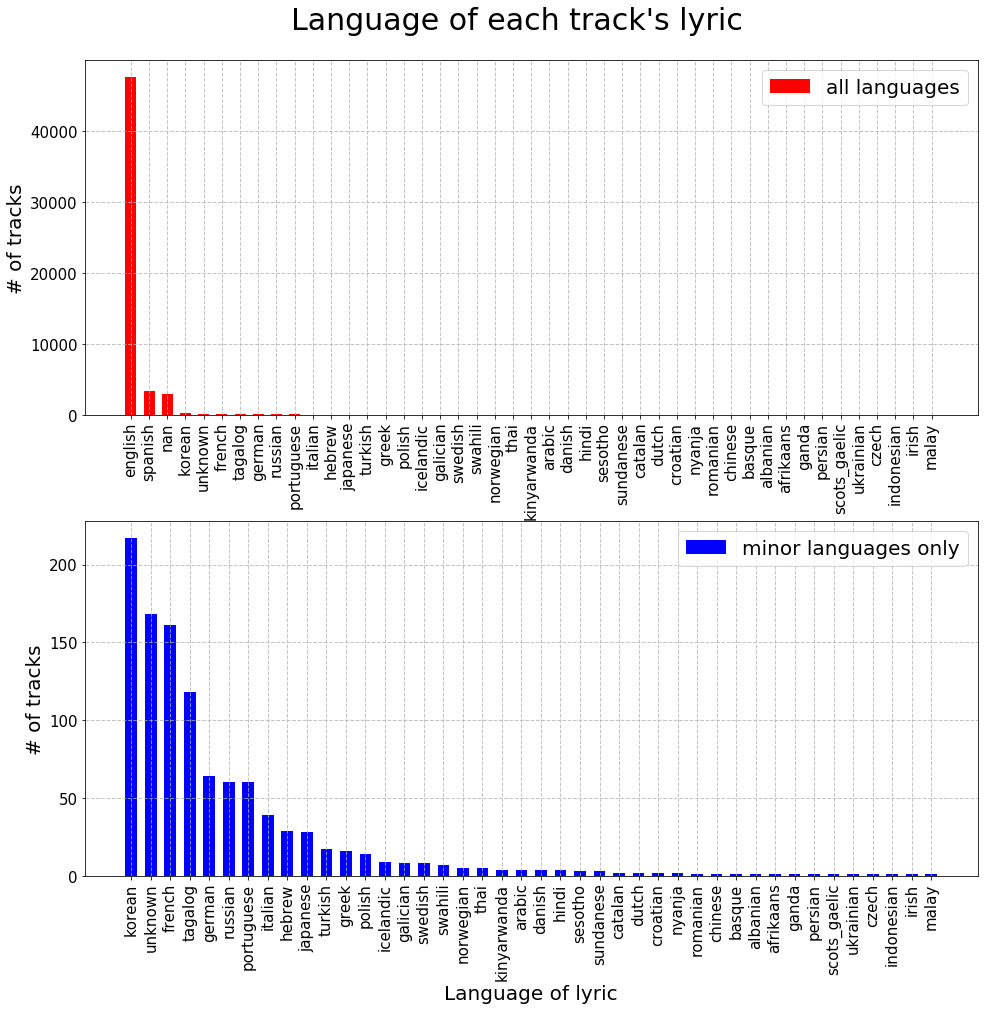

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

plt.subplots_adjust(hspace = 0.3)
width = 0.6

for idx in range(2):
    ax_temp = ax[idx]
    
    if idx == 0:        
        count_array = playlists_df['lyric_language'].value_counts(dropna=False)
        languages = playlists_df['lyric_language'].value_counts(dropna=False).index
        label_text = 'all languages'
        color_str = 'r'
    else:
        count_array = playlists_df['lyric_language'].value_counts(dropna=False)[3:]
        languages = playlists_df['lyric_language'].value_counts(dropna=False).index[3:]
        label_text = 'minor languages only'
        color_str = 'b'
    
    
    ax_temp.bar(range(len(count_array)), count_array, width, color = color_str, label = label_text)
    
    ax_temp.tick_params(labelsize = 15)
    ax_temp.tick_params(axis='x', rotation = 90)
    ax_temp.set_xticks(range(len(count_array)))
    
    # Make labels
    ax_temp.set_ylabel('# of tracks',fontsize=20)
    if idx == 1:
        ax_temp.set_xlabel('Language of lyric',fontsize=20)
    
    ax_temp.set_xticklabels(languages, fontsize=20)
    
    ax_temp.legend(fontsize=20)
    ax_temp.grid(True, lw = 1.0, ls = '--', alpha = 0.75)

fig.suptitle("Language of each track's lyric", fontsize=30, y = 0.93);

## 2) Sentiment analysis

**[Notes]**
- Quickly and efficiently determine if text is positive or negative. <br>
<br>
- The output will return a number between 0 and 1. <br>
This number is a probability representing the likelihood that the analyzed text is positive or negative. <br> 
Values greater than 0.5 indicate positive sentiment, while values less than 0.5 indicate negative sentiment. <br>
<br>
- This analysis will also supports a variety of languages of the input text. <br>
'arabic', 'chinese', 'dutch', 'english', 'french', 'german', 'italian', 'japanese', 'korean', 'portuguese', 'russian', and 'spanish' can be used. <br>
<br>
- In the following cell, you can see the example. <br>
The same sentence was written in a different language using 'Google translate'. <br>
As you can see, positive sentences in any language got high score close to 1. <br>
Neutral sentences in any language got middle score around 0.5. <br>
Negative sentences in any language got low score close to 0. <br>

**[Notes]**
- This function supports a single input and a batch input. <br>
In order to incrase the computation speed, we used batch input. <br>

In [9]:
# number between 0 and 1 (positive : 1, negative : 0)

**[Examples]**

In [10]:
languages = ["english", "spanish", "french", "korean", "russian", 
            "german", "portuguese", "italian", "chinese", "japanese"] # "turkish"

language_codes = ["en", "es", "fr", "ko", "ru", "de", "pt", "it", "ch", "ja"] # "tr"

pos_sentences = ["Awesome. I'm pretty satisfied it. Really good.", # English
                 "Increíble. Estoy bastante satisfecho con eso. Realmente bueno.", # Spanish
                 "Impressionnant. Je suis assez satisfait. Très bien.", # French
                 "굉장해. 나는 그것을 꽤 만족스러워한다. 정말 좋다.", # Korean
                 "Потрясающие. Я очень доволен этим. Действительно хорошо.", # Russian
                 "Genial. Ich bin ziemlich zufrieden damit. Wirklich gut.", # German
                 "Impressionante. Estou muito satisfeito. Muito bom.", # Portuguese
                 "Eccezionale. Sono abbastanza soddisfatto. Veramente buono.", # Italian
                 "驚くばかり。私はそれをかなり満足しています。本当に良い。", # Japanese
                 "真棒。我很满意。真的很好。", # Chinese
                ]

neu_sentences = ["I'm a student. You are a teacher.", # English
                 "Soy un estudiante. Usted es un maestro.", # Spanish
                 "Je suis étudiant. Vous êtes un enseignant.", # French
                 "나는 학생입니다. 당신은 선생님 이예요.", # Korean
                 "Я студент. Ты учитель.", # Russian
                 "Ich bin Student. Du bist ein Lehrer.", # German
                 "Eu sou estudante. Você é um professor.", # Portuguese
                 "Sono uno studente. Sei un insegnante.", # Italian
                 "私は学生です。あなたは先生です。", # Japanese
                 "我是学生。你是老师。", # Chinese
                ]

neg_sentences = ["The worst movies I've seen. Unbelievably bad acting!! Poor direction. VERY poor production.", # English
                 "Las peores películas que he visto. Increíblemente mala actuación !! Dirección pobre. Muy mala producción.", # Spanish
                 "Les pires films que j'ai vus. Incroyablement mauvais jeu !! Mauvaise direction. TRES mauvaise production.", # French
                 "내가 본 최악의 영화들. 믿을 수 없을 정도로 나쁜 연기 !! 불쌍한 방향. 아주 가난한 생산.", # Korean
                 "Худшие фильмы, которые я видел. Невероятно плохая игра !! Плохое направление. ОЧЕНЬ плохое производство.", # Russian
                 "Die schlechtesten Filme, die ich gesehen habe. Unglaublich schlechtes Schauspiel !! Schlechte Richtung SEHR schlechte Produktion.", # German
                 "Os piores filmes que eu vi. Incrivelmente má atuação !! Direção ruim. Produção muito pobre.", # Portuguese
                 "I peggiori film che ho visto. Incredibilmente cattiva recitazione !! Cattiva direzione Produzione MOLTO povera.", # Italian
                 "私が見た最悪の映画。信じられないほど悪い演技!!方向性が悪い。非常に貧しい生産。", # Japanese
                 "我见过的最糟糕的电影。令人难以置信的糟糕表演!!方向不好。非常糟糕的生产。", # Chinese
                ]



pos_res = indicoio.sentiment(pos_sentences)
neu_res = indicoio.sentiment(neu_sentences)
neg_res = indicoio.sentiment(neg_sentences)

res_df = pd.DataFrame({'Positive sentences' : pos_res, 'Neutral sentences' : neu_res,
                       'Negative sentences' : neg_res}, index = languages) 
display(res_df)

# # sid = SentimentIntensityAnalyzer()
# for sentence in neg_sentences:    
# #     print(sentence)
# #     print(indicoio.sentiment(sentence))
# #     print(indicoio.sentiment(sentence, language=language_codes[cnt]))
# #     print(indicoio.sentiment_hq(sentence))
#     print(indicoio.sentiment(sentence, language='detect'))
# #     print(indicoio.sentiment(sentence, language=languages[cnt]))
    
# #     ss = sid.polarity_scores(sentence)
# #     print(ss['neg'] + ss['neu'] + ss['pos'])
# #     for k in sorted(ss):
# #         print('{0}: {1}, '.format(k, ss[k]), end='')
# #     print()

,Positive sentences,Neutral sentences,Negative sentences
english,0.999979,0.882534,2.219526e-07
spanish,0.813910,0.949402,9.738402e-02
french,0.958516,0.831334,8.086406e-01
korean,0.457810,0.747714,8.407334e-02
russian,0.761600,0.286528,6.635511e-01
german,0.427943,0.349280,3.164091e-01
portuguese,0.964010,0.670028,7.298827e-01
italian,0.583000,0.385929,1.739508e-02
chinese,0.636904,0.548752,7.947850e-02
japanese,0.727869,0.185074,3.160064e-01


In [11]:
def detect_sentiment(text_arg : str, language_arg : str, index_arg : int, df_arg, show_log_arg : bool = False):
    '''
    Input
        text_arg : text that we want to detect sentiment
        language_arg : language of the text
        index_arg : index of the dataframe at which text is located
        df_arg : dataframe containing text
        show_log_arg : if True, show the log
    '''
    
    languages = ["english", "spanish", "french", "korean", "russian", 
            "german", "portuguese", "italian", "chinese", "japanese", # "turkish"
            "unknown"] # "chineset"
    
    try:
        if (language_arg.lower().strip() in languages):
            if language_arg.lower().strip() == 'english':
                # English - highly accurate sentiment analysis
                res = indicoio.sentiment_hq(text_arg)
                
            elif language_arg.lower().strip() == 'unknown':
                # if language is not detected, then do not specify the language
                res = indicoio.sentiment(text_arg, language = 'detect')
                
#             elif language_arg.lower().strip() == 'chineset':
#                 # Chinese exception handling
#                 res = indicoio.sentiment(text_arg, language = 'chinese')
                
            else:
                # all other languages
                res = indicoio.sentiment(text_arg, language = language_arg)
            
#             if (show_log_arg):
#                 print(res)
                
            df_arg.at[index_arg, 'sentiment'] = res
            
        else:
            # minor languages
            if (show_log_arg):
                print(f'playlist_num ({index_arg}) [Minor language] : ', language_arg)
            
    except AttributeError:
        # nan
        pass
#         if (show_log_arg):
#             print(f'playlist_num ({index_arg}) [NaN] : ', language_arg)

In [12]:
def detect_sentiment_batch(df_arg):
    '''
    Input
        df_arg : dataframe containing text
    '''
    
    languages = ["english", "spanish", "french", "korean", "russian", 
            "german", "portuguese", "italian", "chinese", "japanese", # "turkish"
            "unknown"] # "chineset"
    
    batch_size = 150
    
    for language in languages:
        num_tracks = len(df_arg[df_arg['lyric_language'] == language])        
        num_batch = num_tracks // batch_size + 1
        
        print(f"\n\n[{language}] lyric processing...")
        
        for batch in range(num_batch):
            lyric_batch = list(df_arg[df_arg['lyric_language'] == language]['lyric'].values[batch*batch_size:(batch+1)*batch_size])
            
            if language == 'english':
                # English - highly accurate sentiment analysis
                res = indicoio.sentiment_hq(lyric_batch)
                
            elif language == 'unknown':
                # if language is not detected, then do not specify the language
                res = indicoio.sentiment(lyric_batch, language = 'detect')
                
#             elif language == 'chineset':
#                 # Chinese exception handling
#                 res = indicoio.sentiment(lyric_batch, language = 'chinese')
                
            else:
                # all other languages
                res = indicoio.sentiment(lyric_batch, language = language)
            
            # minor languages & NaN - do not process sentiment analysis
            
            for track in range(batch_size):
                try:
                    idx = df_arg[df_arg['lyric_language'] == language].index.values[batch*batch_size:(batch+1)*batch_size][track]
                except IndexError:
                    # Last batch
                    break
                
                df_arg.at[idx, 'sentiment'] = res[track]
            
            out = (batch+1) * 1. / num_batch * 100
            sys.stdout.write("\r %.1f %%" % out)
            sys.stdout.flush()

In [13]:
# # 1. Sentiment analysis of each element
# cnt = 0
# for playlist_num in playlists_df.index:
#     detect_sentiment(playlists_df.loc[playlist_num]['lyric'], playlists_df.loc[playlist_num]['lyric_language'], 
#                      playlist_num, playlists_df, True)
    
#     out = (cnt+1) * 1. / len(playlists_df) * 100
#     sys.stdout.write("\r %.1f %%" % out)
#     sys.stdout.flush()
    
#     cnt += 1
    
# # 2. Sentiment batch analysis
# playlists_df = playlists_df.iloc[:1000].copy()

# detect_sentiment_batch(playlists_df_temp)

In [14]:
# # 1. extract all the wrods
# sentence = "The Quick brown fox, Jumps over the lazy little dog. Hello World."
# # sentence.split(" ")
# w = word_tokenize(sentence) 

# # 2. figure out which words are nouns, adverbs, verbs, etc.b
# nltk.pos_tag(w) 
# # list of tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# # nltk.help.upenn_tagset()

# # 3. find the meaning of words, examples of words, similar and opposite words, etc.
# syn = wordnet.synsets("computer") 
# syn[1].name()
# syn[1].definition()
# wordnet.synsets("talk")[0].examples()

# # 4. hyponyms (similar words), hypernyms (root of the word)
# syn = wordnet.synsets("speak")[0] 
# syn.hypernyms()
# syn.hyponyms()

# # 5. synonym and antonym
# syn = wordnet.synsets("good")
# # for s in syn:
# #     for l in s.lemmas():
# #         if (l.antonyms()):
# #             print(l.antonyms())

# syn = wordnet.synsets("book")
# # for s in syn:
# #     print(s.lemmas())

# # 6. stop words - carry little or no meaning, but are really common
# stopwords.words('english')[:16]
# stopwords.words('spanish')[:16]

# para = "The program was open to all women between the ages of 17 and 35, in good health, who had graduated from an accredited high school. "
# words = word_tokenize(para)
# useful_words = [word for word in words if word not in stopwords.words('english')]
# useful_words

# # This is how the Naive Bayes classifier expects the input
# def create_word_features(words):
#     useful_words = [word for word in words if word not in stopwords.words("english")]
#     my_dict = dict([(word, True) for word in useful_words])
#     return my_dict

# neg_reviews = []
# for fileid in movie_reviews.fileids('neg'):
#     words = movie_reviews.words(fileid)
#     neg_reviews.append((create_word_features(words), "negative"))
# neg_reviews

## 3) Topic analysis

**[Notes]**
- Determine the topics in the phrase or document. <br>
<br>

- This function will return a dictionary with 111 key-value pairs. <br>
These key-value pairs represent the likelihood that the analyzed text is about each of the 111 possible topics. <br>
The keys in the dictionary are strings containing the topic names and the values are the probabilities that the analyzed text is about each topic. <br>
<br>

- Among all the probabilities, we chose a single cateogory with highest likelihood. <br>
<br>

- 111 categories are : anime, anthropology, archery, ... , wrestling, writing, yoga <br>
<br>

- This analysis will only supports English. <br>
<br>

- In the following cell, you can see the example. <br>
We tried two differnet paragraph. <br>
The first one is decribing the arrow and the second one explains the cooking. <br>
Topic is categorized as 'archery' and 'general_food', which are correct. <br>

**[Notes]**
- This function supports a single input and a batch input. <br>
In order to incrase the computation speed, we used batch input. <br>

In [15]:
# # Complete list of tags - 111 key values
# anime, anthropology, archery, architecture, art, astronomy, atheism, aviation, baseball, beer, bicycling, biology, books, boxing, buddhism, business, cars, christianity, climbing, comedy, comics, conspiracy, cooking, crafts, cricket, design, dieting, diy, drugs, economic_discussion, education, electronics, energy, entertainment_news, environmental, fashion, fiction, film, fishing, fitness, gaming, gardening, gender_issues, general_food, golf, guns, health, history, hockey, hunting, individualist_politics, investment, islam, jobs, judaism, left_politics, lgbt, math, medicine, military, music, nba, news, nfl, nostalgia, nutrition, parenting, personal, personal_care_and_beauty, personalfinance, pets, philosophy, photography, poetry, poker, political_discussion, programming, psychology, realestate, relationships, religion, right_politics, romance, rugby, running, sailing, school, science, scuba, singing, skateboarding, soccer, sports, startups_and_entrepreneurship, surfing, swimming, tattoo, technology, television, tennis, travel, ultimate, vegan, vegetarian, weather, wedding, weight_training, wine, wrestling, writing, yoga

**[Examples]**

In [16]:
text = ["The most common form of arrow consists of a shaft with an arrowhead attached to the front end and with fletchings and a nock attached to the other end.",
        "Cooking is similar to science. In order to make delicious food, you need to put right amount of ingredient."]
topic_res = indicoio.text_tags(text, top_n = 1)

# # single output
# list(topic_res.keys())[0] 

# batch output
for topic in topic_res:
    print('Topic : ', list(topic.keys())[0])

Topic :  archery
Topic :  general_food


## 4) Emotion analysis (of a text's author)

**[Notes]**
- Predicts the emotion expressed by an author in a sample of text. <br>
<br>

- This function returns a dictionary that maps from 5 emotions (anger, fear, joy, sadness, surprise) to the probability that the author is expressing the respective emotion. <br>
<br>

- Among all the probabilities, we chose a single emotion with highest likelihood. <br>
<br>

- 5 categories are : anger, fear, joy, sadness, surprise <br>
<br>

- This analysis will only supports English. <br>
<br>

- In the following cell, you can see the example. <br>
We tried two differnet paragraph. <br>
The first one is decribing the situation where you are admitted in a graduate school and the second one describes the situation of an unemployed person. <br>
Emotion is categorized as 'joy' and 'sadness', which are correct. <br>

**[Notes]**
- This function supports a single input and a batch input. <br>
In order to incrase the computation speed, we used batch input. <br>

In [17]:
# anger, joy, fear, sadness, surprise - probability

**[Examples]**

In [18]:
text = ["I did it. I got into Grad School. Not just any program, but a GREAT program. :-)",
    "Like seriously my life is bleak, I have been unemployed for almost a year."]
emotion_res = indicoio.emotion(text, top_n = 1)

# batch output
for emotion in emotion_res:
    print('Emotion : ', list(emotion.keys())[0])

Emotion :  joy
Emotion :  sadness


## 5) Personality analysis (of a text's author)

**[Notes]**
- Predicts the personality traits of a text's author. <br>
<br>

- This function returns a dictionary that maps the following personality traits to their likelihood of describing the author: extraversion, openness, agreeableness, conscientiousness. <br> 
These values are independent, meaning the probabilities don't effect each other. <br>
For example, somebody could score 0.9 (90%) on extraversion and 0.86 (86%) on openness. <br>
<br>

- Thus, we added 4 features related to personality : extraversion, openness, joy, agreeableness, conscientiousness <br>
<br>

- This analysis will only supports English. <br>
<br>

- In the following cell, you can see the example. <br>
Prediction results make sense. <br>

**[Notes]**
- This function supports a single input and a batch input. <br>
In order to incrase the computation speed, we used batch input. <br>

In [19]:
# extraversion, openness, agreeableness, conscientiousness - independent probability (0 - 1)

**[Examples]**

In [20]:
text = ['I love my frineds',
       'Everything is awesome!']

personality_res = indicoio.personality(text)

# batch output
for personality in personality_res:
    print(personality)
#     print(personality['extraversion'])

{'extraversion': 0.6642529535091528, 'openness': 0.4476951639228891, 'agreeableness': 0.6283197047417624, 'conscientiousness': 0.4301604087325348}
{'extraversion': 0.5596557571473769, 'openness': 0.38964215533755653, 'agreeableness': 0.7437441924162077, 'conscientiousness': 0.5030560495182016}


## 6) Analyze Text - Make calls to many APIs in parallel

**[Notes]**
- Make calls to many APIs in parallel. <br>
<br>

- The output is a dictionary where each key maps to the specified models' results. <br>
<br>

- Thus, we used 'analyze text' for the all anlaysis of aforementioned features.<br>
<br>

**[Notes]**
- This function supports a single input and a batch input. <br>
In order to incrase the computation speed, we used batch input. <br>

**[Examples]**

In [21]:
text = ["I did it. I got into Grad School. Not just any program, but a GREAT program. :-)",
    "Like seriously my life is bleak, I have been unemployed for almost a year."]

analyze_res = indicoio.analyze_text(text, apis = ['sentiment_hq','text_tags','emotion','personality'])

for text_num in range(len(analyze_res['sentiment_hq'])):
    print('\nIndex : ', text_num)
    print('Sentiment : ', analyze_res['sentiment_hq'][text_num])
    print('Topic : ', list(analyze_res['text_tags'][text_num].keys())[0])
    print('Emotion : ', list(analyze_res['emotion'][text_num].keys())[0])
    print('Personality : ', analyze_res['personality'][text_num])


Index :  0
Sentiment :  0.99012995
Topic :  biology
Emotion :  joy
Personality :  {'extraversion': 0.5107312634334725, 'openness': 0.4402669484370222, 'agreeableness': 0.5612221328835738, 'conscientiousness': 0.5326214655377399}

Index :  1
Sentiment :  0.869863
Topic :  jobs
Emotion :  sadness
Personality :  {'extraversion': 0.5175398138620086, 'openness': 0.49865914170987136, 'agreeableness': 0.5332363885745667, 'conscientiousness': 0.4935948793915496}


In [22]:
def analyze_text_batch(df_arg):
    '''
    Input
        df_arg : dataframe containing text
    '''
    
    languages = ["english", "spanish", "french", "korean", "russian", 
            "german", "portuguese", "italian", "chinese", "japanese", "unknown"]
    
    pensonalities = ['extraversion', 'openness', 'agreeableness', 'conscientiousness']
    
    batch_size = 100
    
    for language in languages:
        num_tracks = len(df_arg[df_arg['lyric_language'] == language])        
        num_batch = num_tracks // batch_size + 1
        
        print(f"\n[{language}] processing...")
        
        for batch in range(num_batch):
            lyric_batch = list(df_arg[df_arg['lyric_language'] == language]['lyric'].values[batch*batch_size:(batch+1)*batch_size])
            
            if language == 'english':
                # English - highly accurate sentiment analysis & topic anlaysis & emotion analysis & personality analysis
#                 res = indicoio.sentiment_hq(lyric_batch)
                analyze_res = indicoio.analyze_text(lyric_batch, apis = ['sentiment_hq','text_tags','emotion','personality'])
                
            elif language == 'unknown':
                # if language is not detected, then do not specify the language
                res = indicoio.sentiment(lyric_batch, language = 'detect')
                
            else:
                # all other languages
                res = indicoio.sentiment(lyric_batch, language = language)
            
            # minor languages & NaN - do not process sentiment analysis
            
            for track in range(batch_size):
                try:
                    idx = df_arg[df_arg['lyric_language'] == language].index.values[batch*batch_size:(batch+1)*batch_size][track]
                except IndexError:
                    # Last batch
                    break
                
                if language == 'english':
                    # Sentiment analysis 
                    df_arg.at[idx, 'NLP_sentiment'] = analyze_res['sentiment_hq'][track]
                    
                    # Topic analysis
                    df_arg.at[idx, 'NLP_topic'] = list(analyze_res['text_tags'][track].keys())[0]
                    
                    # Emotion analysis
                    df_arg.at[idx, 'NLP_emotion'] = list(analyze_res['emotion'][track].keys())[0]
                    
                    # Personality analysis
                    for personality in pensonalities:
                        df_arg.at[idx, 'NLP_personality_' + personality] = analyze_res['personality'][track][personality]
                    
                else:
                    df_arg.at[idx, 'NLP_sentiment'] = res[track]
            
            out = (batch+1) * 1. / num_batch * 100
            sys.stdout.write("\r %.1f %%" % out)
            sys.stdout.flush()

In [ ]:
# Analyze text batch result

# # 1. Process whole data once
# analyze_text_batch(playlists_df)

# 2. Process a chunk of it and save
start_file_num = 0
end_file_num = 54

chunk_size = 1000
num_chunk = math.ceil(len(playlists_df)/chunk_size)

for i in range(start_file_num, end_file_num+1): # range(num_chunk):
    playlists_df_temp = playlists_df[i*chunk_size:(i+1)*chunk_size].copy()
    
    print("\n\nFile # : ", i)
    
    analyze_text_batch(playlists_df_temp)
    
    playlists_df_temp.to_pickle('NLP/playlists_df_' + str(i) + '.pkl')

## 7) EDA

In [23]:
# load the data from the file

start_file = 0
end_file = 54

playlists_df = pd.DataFrame()

for file_num in range(start_file, end_file+1):
    filename = 'NLP/playlists_df_' + str(file_num) + '.pkl'
    playlists_df = playlists_df.append(pd.read_pickle(filename), sort = False)
    
display(playlists_df.head())
print('Shape of dataframe : ', playlists_df.shape)

,acoustic,acousticness,afrobeat,album_name,album_uri,alt-rock,alternative,ambient,anime,artist_name,artist_uri,black-metal,bluegrass,blues,bossanova,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,collaborative,comedy,country,dance,danceability,dancehall,death-metal,deep-house,description,detroit-techno,disco,disney,drum-and-bass,dub,dubstep,duration_ms,edm,electro,electronic,emo,energy,folk,forro,french,funk,garage,german,gospel,goth,grindcore,groove,grunge,guitar,happy,hard-rock,hardcore,hardstyle,heavy-metal,hip-hop,holidays,honky-tonk,house,idm,indian,indie,indie-pop,industrial,instrumentalness,iranian,is_genius,j-dance,j-idol,j-pop,j-rock,jazz,k-pop,key,kids,latin,latino,liveness,loudness,lyric,malay,mandopop,metal,metal-misc,metalcore,minimal-techno,mode,modified_at,movies,mpb,name,new-age,new-release,num_albums,num_artists,num_edits,num_followers,num_tracks,opera,pagode,party,philippines-opm,piano,pid,playlist_duration_ms,pop,pop-film,popularity,pos,post-dubstep,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,rainy-day,reggae,reggaeton,related_artist_0,related_artist_1,related_artist_2,related_artist_3,related_artist_4,related_artist_5,related_artist_6,related_artist_7,related_artist_8,related_artist_9,related_artist_n,road-trip,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,soundtracks,spanish,speechiness,study,summer,swedish,synth-pop,tango,techno,tempo,time_signature,top_track_0,top_track_1,top_track_2,top_track_3,top_track_4,top_track_5,top_track_6,top_track_7,top_track_8,top_track_9,top_track_n,track_name,track_uri,trance,trial,trip-hop,try_idx,turkish,valence,work-out,world-music,year,is_top_track,is_top_track_0,is_top_track_1,is_top_track_2,is_top_track_3,is_top_track_4,is_top_track_5,is_top_track_6,is_top_track_7,is_top_track_8,is_top_track_9,track_name_language,track_name_language_reliable,lyric_language,lyric_language_reliable,NLP_sentiment,NLP_topic,NLP_emotion,NLP_personality_extraversion,NLP_personality_openness,NLP_personality_agreeableness,NLP_personality_conscientiousness
0,0.0,0.011400,0.0,127 Hours,spotify:album:70wOJPVD0SKMn0DtddtZP3,0.0,0.0,0.0,0.0,Free Blood,spotify:artist:58cwi0vXDQEihBLREQTBGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,0.0,0.775,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,351640,0.0,0.0,0.0,0.0,0.828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367000,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.2460,-7.511,There must be some fucking chemical (Chemical ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492992000,0.0,0.0,BIKING,0.0,0.0,97,93,67,31,100,0.0,0.0,0.0,0.0,0.0,391407,24415031,0.0,0.0,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spotify:artist:4zFfG4YHoSp9uxAHAdwv1W,spotify:artist:5CUQPbbOibUHRBIw9sU2wi,spotify:artist:5vKYoar0sNGd9XkcwVxX7z,spotify:artist:7gG6LkU3pCSQmCIPR4aSBt,spotify:artist:4mQBSbhPqSQ7feJeaJhfWP,spotify:artist:6e8CEWxyjr08sZdm8rnyHM,spotify:artist:1YBlUfzrF68OUYOC5Dyvab,spotify:artist:6baWjwY7WiVPCZcW7pqqhz,spotify:artist:2MwbiW5alh5hvh64SOOWMh,spotify:artist:6P4lf0XbkcwHMRlkTI5ACo,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0503,0.0,0.0,0.0,0.0,0.0,0.0,108.016,4.0,spotify:track:3ihS3VFJaMoOiGnqNQkofK,spotify:track:2cAlHfVD1Q2wEU6uwipRvc,spotify:track:3PVBYmDOolNqNWQcrY85zn,spotify:track:6eqyr38v77Y13G2EPX2Njl,spotify:track:09H8bis4vzY3jEsVy5KYfF,spotify:track:4GRLoSad0HeAkdKuysxZ87,spotify:track:2C9UMgOxNro5N97v2ytzZu,,,,7.0,Never Hear Surf Music Again,spotify:track:0PxPcrfAXNu0MpKRwdlbuc,0.0,0.0,0.0,0.0,0.0,0.531,0.0,0.0,2010.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,english,1.0,english,1.0,0.921551,drugs,sadness,0.545398,0.455326,0.594833,0.475259
1,0.0,0.094400,0.0,Waves,spotify:album:2R6wefBXnMzCkRoqD7FdNk,0.0,0.0,0.0,0.0,Joey Bada$$,spotify:artist:2P5sC9cVZDToPxyomzF1UH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,0.0,0.0,

Shape of dataframe :  (55000, 207)


In [24]:
playlists_df.to_pickle('NLP/playlists_df_all.pkl')

### [1] Sentiment

/Users/jinsookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


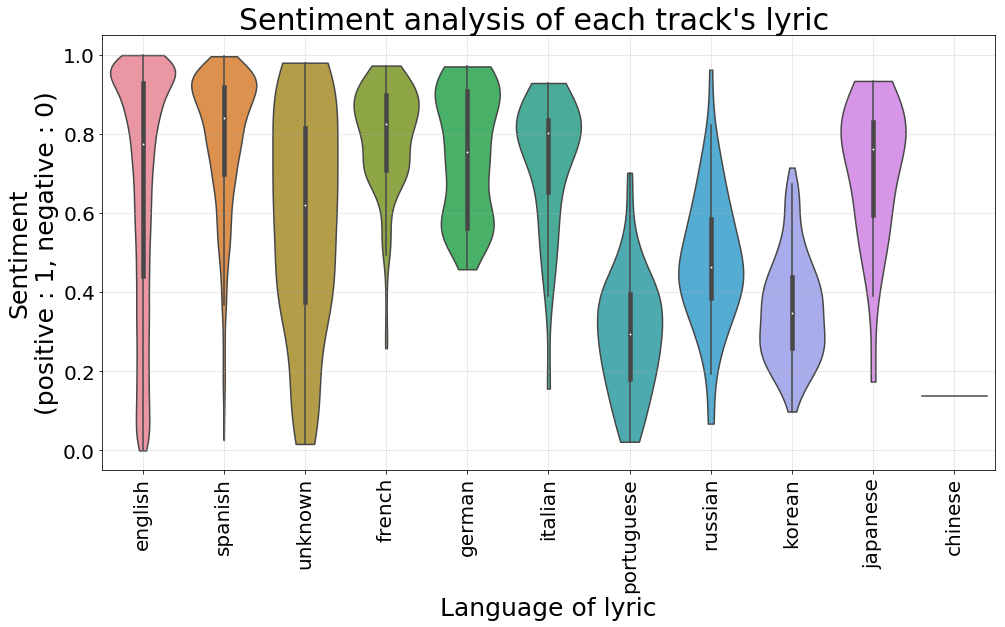

In [25]:
threshold_cnt = 10

# idx = playlists_df['lyric_language'].value_counts() > threshold_cnt
# languages = playlists_df['lyric_language'].value_counts()[idx].index

languages = ["english", "spanish", "french", "korean", "russian", 
            "german", "portuguese", "italian", "chinese", "japanese", "unknown"]

select_idx = None

for language in languages:
    temp = (playlists_df['lyric_language'] == language).values
    select_idx = np.logical_or(select_idx, temp)



fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# sns.violinplot(x = "lyric_language", y = "NLP_sentiment", data = playlists_df[select_idx], ax = ax)
sns.violinplot(x = "lyric_language", y = "NLP_sentiment", 
               data = playlists_df[select_idx], scale = 'width', cut = 0, ax = ax)


ax.tick_params(labelsize = 20)
ax.tick_params(axis='x', rotation = 90)

# Make labels
ax.set_ylabel(f'Sentiment\n(positive : 1, negative : 0)', fontsize=25)
ax.set_xlabel('Language of lyric', fontsize=25)

# ax.legend(fontsize=20)
ax.grid(True, lw =  0.5, ls = '--', alpha = 0.75)

fig.suptitle("Sentiment analysis of each track's lyric", fontsize=30, y = 0.93);

### [2] Topic

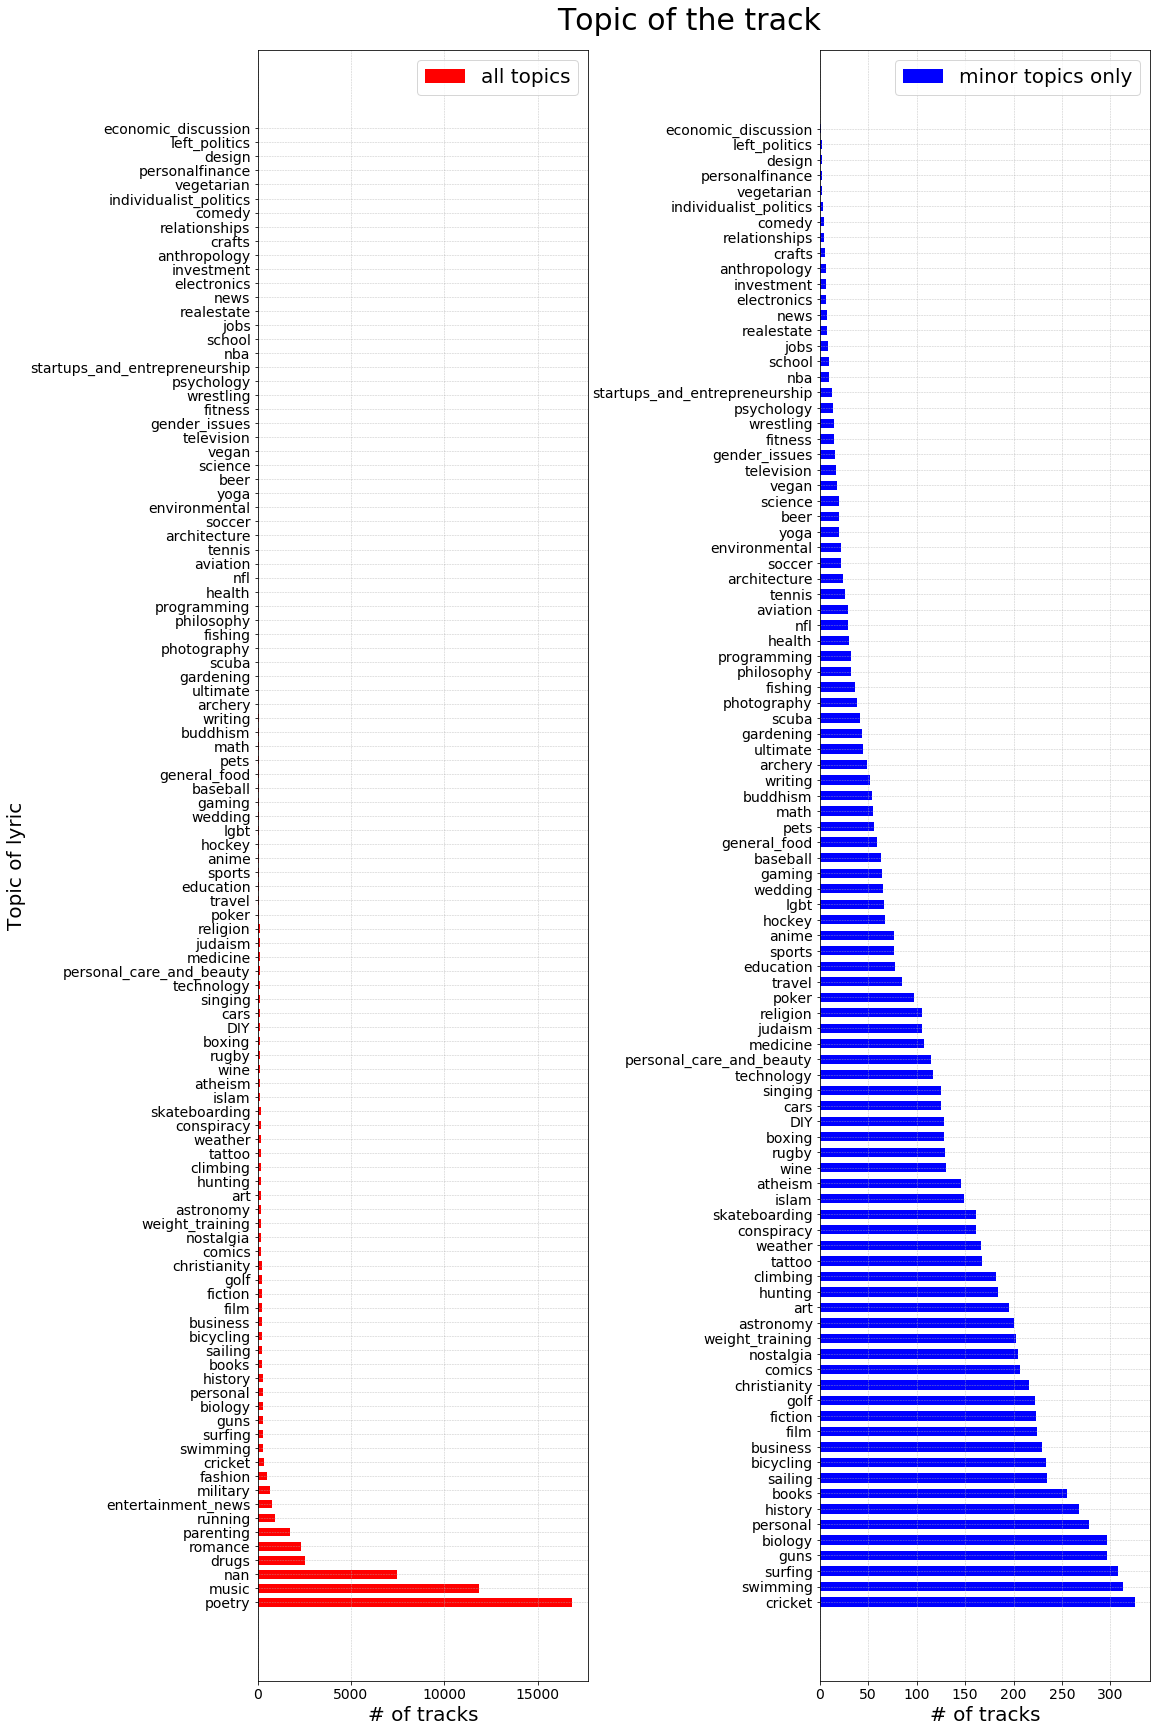

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 30))

plt.subplots_adjust(wspace = 0.7)
width = 0.6

for idx in range(2):
    ax_temp = ax[idx]

    

    if idx == 0:        
        count_array = playlists_df['NLP_topic'].value_counts(dropna=False)
        topics = playlists_df['NLP_topic'].value_counts(dropna=False).index
        label_text = 'all topics'
        color_str = 'r'
    else:
        count_array = playlists_df['NLP_topic'].value_counts(dropna=False)[10:]
        topics = playlists_df['NLP_topic'].value_counts(dropna=False).index[10:]
        label_text = 'minor topics only'
        color_str = 'b'

    ax_temp.barh(range(len(count_array)), count_array, width, color = color_str, label = label_text)

    ax_temp.tick_params(labelsize = 14)
#     ax_temp.tick_params(axis='y', rotation = 45)
    ax_temp.set_yticks(range(len(count_array)))

    # Make labels
    ax_temp.set_xlabel('# of tracks',fontsize=20)
    if idx == 0: 
        ax_temp.set_ylabel('Topic of lyric',fontsize=20)

    ax_temp.set_yticklabels(topics, fontsize=20)

    ax_temp.legend(fontsize=20)
    ax_temp.grid(True, lw =  0.5, ls = '--', alpha = 0.75)

fig.suptitle("Topic of the track", fontsize=30, y = 0.9);

In [27]:
# fig, ax = plt.subplots(2, 1, figsize=(16, 80))

# plt.subplots_adjust(hspace = 0.05)
# width = 0.6

# for idx in range(2):
#     ax_temp = ax[idx]

    

#     if idx == 0:        
#         count_array = playlists_df['NLP_topic'].value_counts(dropna=False)
#         topics = playlists_df['NLP_topic'].value_counts(dropna=False).index
#         label_text = 'all topics'
#         color_str = 'r'
#     else:
#         count_array = playlists_df['NLP_topic'].value_counts(dropna=False)[10:]
#         topics = playlists_df['NLP_topic'].value_counts(dropna=False).index[10:]
#         label_text = 'minor topics only'
#         color_str = 'b'

#     ax_temp.barh(range(len(count_array)), count_array, width, color = color_str, label = label_text)

#     ax_temp.tick_params(labelsize = 20)
# #     ax_temp.tick_params(axis='y', rotation = 45)
#     ax_temp.set_yticks(range(len(count_array)))

#     # Make labels
#     ax_temp.set_xlabel('# of tracks',fontsize=25)

#     ax_temp.set_ylabel('Topic of lyric',fontsize=25)

#     ax_temp.set_yticklabels(topics, fontsize=25)

#     ax_temp.legend(fontsize = 25)
#     ax_temp.grid(True, lw =  0.5, ls = '--', alpha = 0.75)

# fig.suptitle("Topic of the track", fontsize=30, y = 0.89);

### [3] Emotion

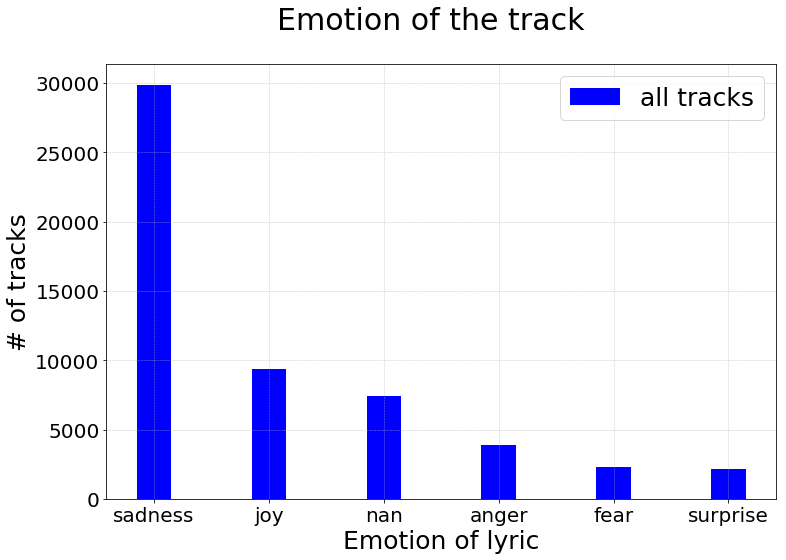

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

width = 0.3

count_array = playlists_df['NLP_emotion'].value_counts(dropna=False)
emotions = playlists_df['NLP_emotion'].value_counts(dropna=False).index
label_text = 'all tracks'
color_str = 'b'


ax.bar(range(len(count_array)), count_array, width, color = color_str, label = label_text)

ax.tick_params(labelsize = 20)
# ax.tick_params(axis='x', rotation = 90)
ax.set_xticks(range(len(count_array)))

# Make labels
ax.set_ylabel('# of tracks',fontsize=25)
ax.set_xlabel('Emotion of lyric',fontsize=25)

ax.set_xticklabels(emotions, fontsize=20)

ax.legend(fontsize=25)
ax.grid(True, lw =  0.5, ls = '--', alpha = 0.75)

fig.suptitle("Emotion of the track", fontsize=30, y = 0.98);

### [4] Personality

/Users/jinsookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


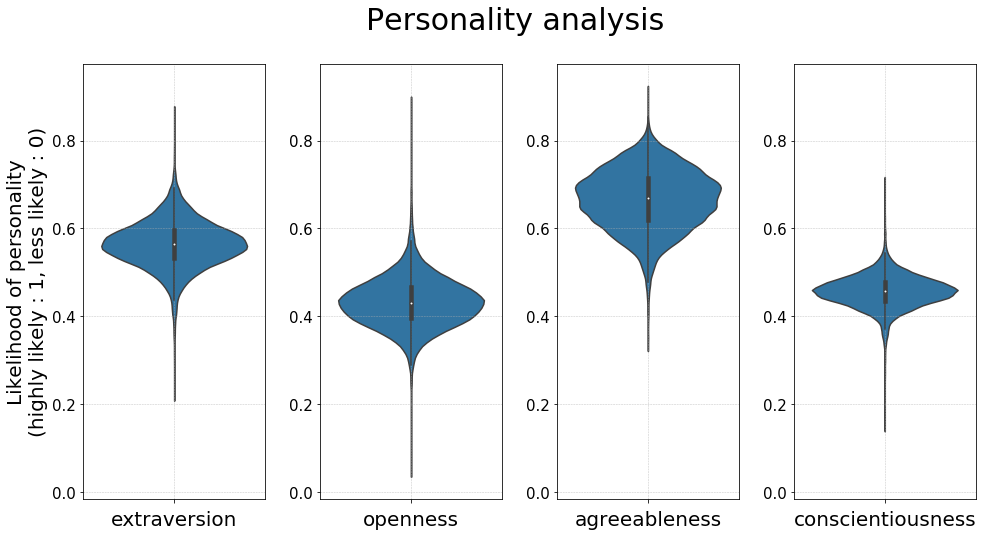

In [29]:
pensonalities = ['extraversion', 'openness', 'agreeableness', 'conscientiousness']
col_pensonalities = ["NLP_personality_" + personality for personality in pensonalities]

ymax = playlists_df[col_pensonalities].max().values.max() + 0.05
ymin = playlists_df[col_pensonalities].min().values.min() - 0.05

fig, ax = plt.subplots(1, len(pensonalities), figsize=(16, 8))
plt.subplots_adjust(wspace = 0.3)

for idx in range(len(pensonalities)):
    ax_temp = ax[idx]
    
    sns.violinplot(y = col_pensonalities[idx], data = playlists_df, cut = 0, ax = ax_temp)

    ax_temp.tick_params(labelsize = 15)
#     ax_temp.tick_params(axis='x', rotation = 90)

    # Make labels
    if idx == 0:
        ax_temp.set_ylabel(f'Likelihood of personality\n(highly likely : 1, less likely : 0)', fontsize=20)
    else:
        ax_temp.set_ylabel('', fontsize=20)
    
    # ylim
    ax_temp.set_ylim(ymin, ymax)
    
    ax_temp.set_xlabel(pensonalities[idx], fontsize=20)

    # ax_temp.legend(fontsize=20)
    ax_temp.grid(True, lw =  0.5, ls = '--', alpha = 0.75)

fig.suptitle("Personality analysis", fontsize=30, y = 0.98);